In [89]:
import numpy as np
import pandas as pd ## for data analysis ,manipulation and  exploration data
import matplotlib.pyplot as plt   ## for graphs 
import seaborn as sns ## visualisation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg') ### for making graphs clear visible
import plotly.express as px

In [90]:
df=pd.read_csv('hr_attrition_1.csv') ### load the data and name it as df

In [91]:
df.columns ## let's find out the columns we are working on

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'working_status', 'job_satifaction',
       'hourly_rate_status', 'Unnamed: 17', 'employee_left'],
      dtype='object')

In [92]:
df.isna().sum() ## try to find null value but found no great

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
HourlyRate                  0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
working_status              0
job_satifaction             0
hourly_rate_status          0
Unnamed: 17              1470
employee_left               0
dtype: int64

## ok everything seems to be ok now it's time to go ahead

### ok let us find attrition on basis of gender

In [241]:
gender_wise=df.groupby('Gender')['employee_left']\
.sum().to_frame('employee_left').reset_index() ## to get result in arranged value below

In [242]:
gender_wise

,Gender,employee_left
0,Female,588
1,Male,882


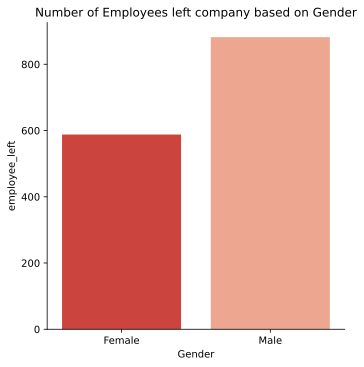

In [243]:
sns.catplot(x='Gender',y="employee_left",data=gender_wise,\
            kind='bar',palette='Reds_r')
plt.title("Number of Employees left company based on Gender")
plt.show()

# Inferences
   #### by seeing above graph it seems male had left company more in numbers than woman ,reasons could be appraisal,their    responsibility etc.

# let us check rate  based on department

In [244]:
department_wise=df.groupby('Department')\
['employee_left'].sum().to_frame().reset_index()

In [245]:
department_wise

,Department,employee_left
0,Human Resources,63
1,Research & Development,961
2,Sales,446


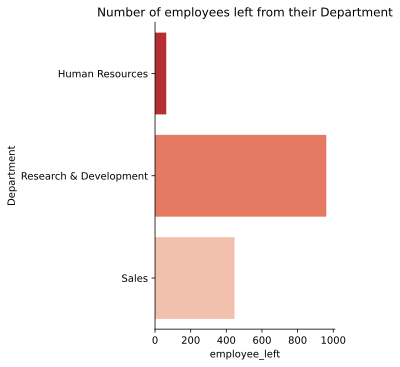

In [247]:
sns.catplot(x='employee_left',y='Department',\
            data=department_wise,kind='bar',palette='Reds_r')
plt.title('Number of employees left from their Department')
plt.show()

# Inferences
   ##### In above graph `Research and Development` has highest number of employee left followed by sales ,reason could be difficulty in job.

# let us discuss further with marital status

In [100]:
heatmap_=pd.crosstab(df.MaritalStatus,df.Gender,df.employee_left,aggfunc=sum)

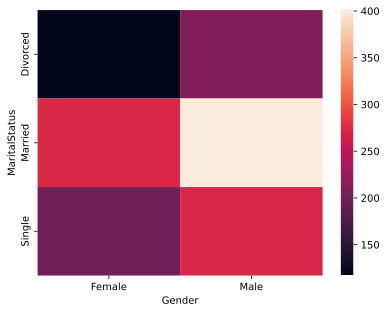

In [101]:
sns.heatmap(heatmap_)
plt.show()

# inferences 
   ##### in above graph , males with a marital_status of `married` are more likely and had left the job.once again reason could be their responsibility after marriage obviously their salary and `divorced female` are less likely and had left jobs .
   

In [102]:
df.rename(columns={'job_satifaction':'job_satisfaction'},inplace=True)

In [103]:
satisfaction=df.groupby('job_satisfaction')['employee_left'].sum().to_frame().reset_index()

In [104]:
satisfaction.set_index('job_satisfaction',inplace=True)

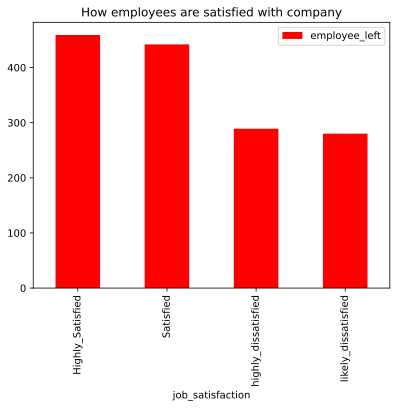

In [105]:
satisfaction.plot(kind='bar',color='r')
plt.title('How employees are satisfied with company')
plt.show()

## inferences
 #### in above graph picture is totally different employee who chose option highly satisfied are the one who had left and likely to left company the reason could unknown or they just selected option without being rational selection.

In [111]:
heatmap_2=pd.crosstab(df.Gender,df.job_satisfaction,df.employee_left,aggfunc=sum)

In [113]:
heatmap_2

job_satisfaction,Highly_Satisfied,Satisfied,highly_dissatisfied,likely_dissatisfied
Gender,,,,
Female,170,181,119,118
Male,289,261,170,162


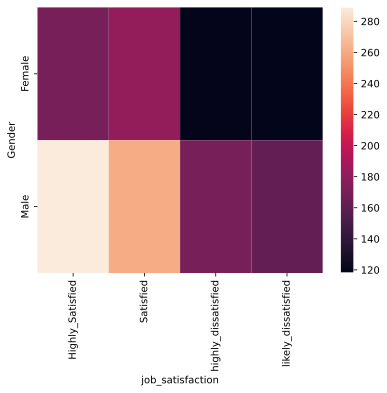

In [112]:
sns.heatmap(heatmap_2)
plt.show()

### In this heatmap there is clear picture men have more attrition than women,`highly satisfied` leaving company .

## ok let us go ahead and have a talk with this `Job_role`

In [248]:
job_role=df.groupby('JobRole')['employee_left'].sum().to_frame().reset_index().sort_values(by='employee_left',ascending=False)

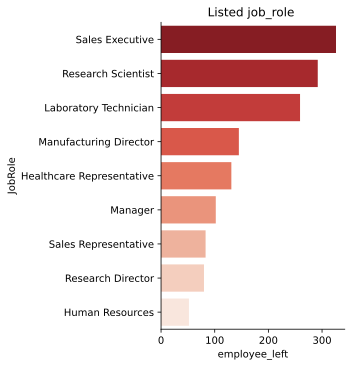

In [249]:
sns.catplot(x='employee_left',y='JobRole',data=job_role,palette='Reds_r',kind='bar')
plt.title('Listed job_role ')
plt.show()

# Inferences
  ##### By seeing above chart it clearly mentions sales executive is `job_role`, from where most employees are leaving .Again reason could be anything but can be difficulty in job_role.

In [134]:
heatmap_3=pd.crosstab(df.Gender,df.JobRole,df.employee_left,aggfunc=sum)

In [135]:
heatmap_3

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Gender,,,,,,,,,
Female,51,16,85,47,72,33,114,132,38
Male,80,36,174,55,73,47,178,194,45


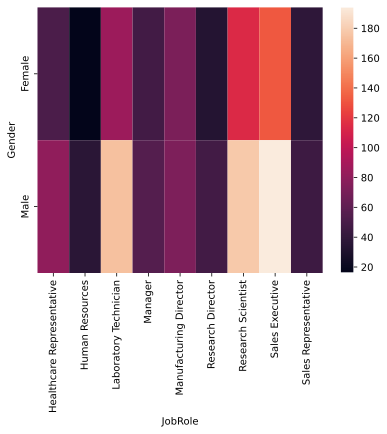

In [137]:
sns.heatmap(heatmap_3)
plt.show()

# inferences
 ##### As we can in this graph ,male with job_role of Lab technician,Research_scientist and sales_executive are more prone to attrition and results are opposite in case of female.

# let us explore how hourly rate impact attrition 

In [251]:
hour_rate=df.groupby('hourly_rate_status')\
['employee_left'].sum().to_frame().reset_index().sort_values(by='employee_left',ascending=False)

In [252]:
hour_rate

,hourly_rate_status,employee_left
1,good_hour_rate,669
2,medium_hour_rate,408
0,Low_hour_rate,393


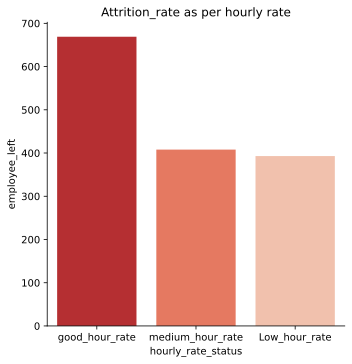

In [253]:
sns.catplot(x='hourly_rate_status',\
            y='employee_left',data=hour_rate,kind='bar',palette='Reds_r')
plt.title('Attrition_rate as per hourly rate')
plt.show()


# inferences 
 #### It seems so confusing people `good_hour_rate` leaving company , perhaps they are expecting more pay

In [254]:
heatmap_4=pd.crosstab(df.Gender,df.hourly_rate_status,\
                      df.employee_left,aggfunc=sum)

In [255]:
colormap=sns.color_palette("Blues",12)

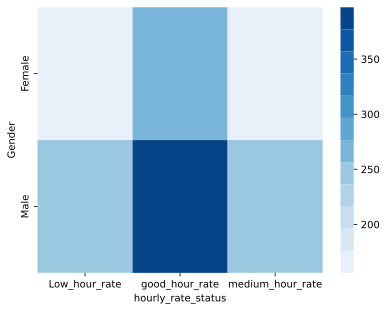

In [256]:
sns.heatmap(heatmap_4,cmap=colormap)
plt.show()

#### same story repeated here ,situation is too opposite 

## ok take education_status

In [172]:
education=df.groupby('EducationField')['employee_left'].sum().to_frame().reset_index().sort_values(by='employee_left',ascending=False,ignore_index=True)

In [173]:
education

,EducationField,employee_left
0,Life Sciences,606
1,Medical,464
2,Marketing,159
3,Technical Degree,132
4,Other,82
5,Human Resources,27


[Text(0, 0, '606'),
 Text(0, 0, '464'),
 Text(0, 0, '159'),
 Text(0, 0, '132'),
 Text(0, 0, '82'),
 Text(0, 0, '27')]

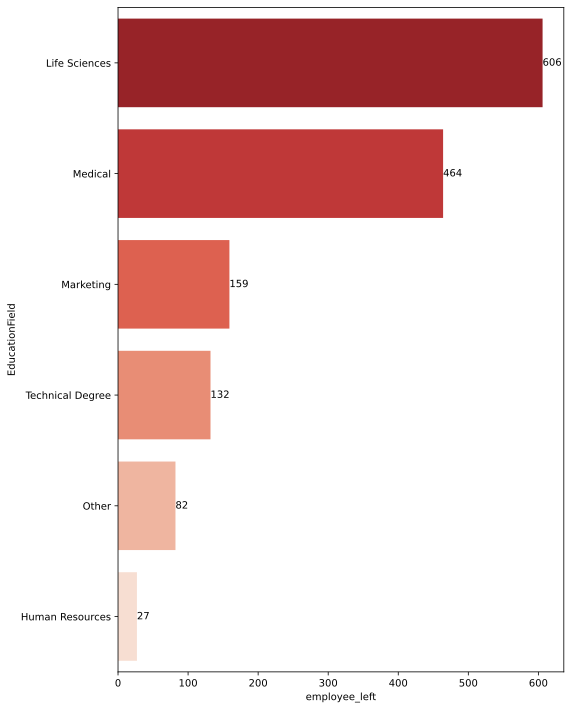

In [198]:
plt.figure(figsize=(8,12))
ax=sns.barplot(x='employee_left',y='EducationField',data=education,palette='Reds_r')
ax.bar_label(ax.containers[0])

# Inference 
  ### employee those had `Life Sciences` more likely to leave company followed by `medical` and `marketing`.

In [201]:
heatmap_5=pd.crosstab(df.Gender,df.EducationField,df.employee_left,aggfunc=sum)

In [208]:
colormap=sns.color_palette('Reds',15)

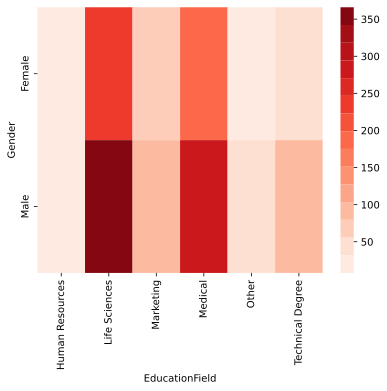

In [210]:
sns.heatmap(heatmap_5,cmap=colormap)
plt.show()

### this heatmap clearly shows everything about attrition 

# Ok let us consider age also but in dynamic way 

In [257]:
n=int(input('put your number :\n')) ## created input function for getting age_bin dynamically

put your number :
6


In [258]:
df['Age_bin']=pd.cut(df.Age,bins=n)

In [259]:
age_bin=df.Age_bin.value_counts().to_frame().reset_index()

In [260]:
age_bin

,index,Age_bin
0,"(32.0, 39.0]",432
1,"(25.0, 32.0]",393
2,"(39.0, 46.0]",282
3,"(46.0, 53.0]",153
4,"(17.958, 25.0]",123
5,"(53.0, 60.0]",87


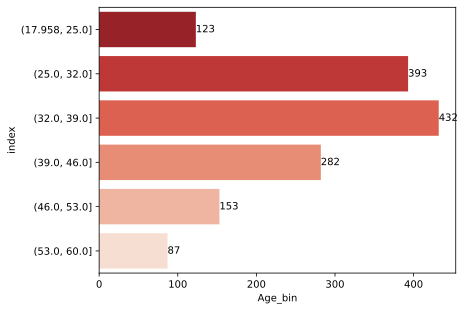

In [269]:
ax=sns.barplot(x='Age_bin',y='index',\
            data=age_bin,palette='Reds_r')
ax.bar_label(ax.containers[0])
plt.show()

# inferences 
#### this clearly shows age_group from 32-39 more likely to leaving company and you can change age_bin as well

In [264]:
heatmap_6=pd.crosstab(df.Gender,df.\
                      Age_bin,df.employee_left,aggfunc=sum)

In [265]:
colormap_1=sns.color_palette('Greens',20)

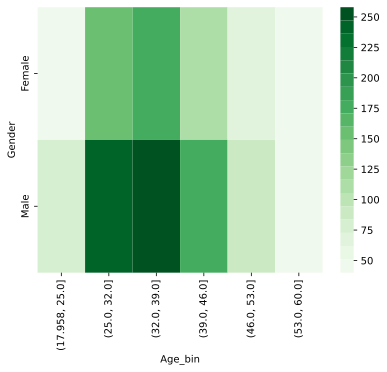

In [266]:
sns.heatmap(heatmap_6,cmap=colormap_1)
plt.show()